# TRAINING PROJECT : CREDIT CARD FRAUD DETECTION


### Importing The Libraries

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

### Getting The Dataset

In [388]:
df = pd.read_csv('creditcard.csv')
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This data frame has 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [389]:
df.describe().astype(int)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,...,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
mean,94813,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,88,0
std,47488,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,250,0
min,0,-56,-72,-48,-5,-113,-26,-43,-73,-13,...,-34,-10,-44,-2,-10,-2,-22,-15,0,0
25%,54201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
50%,84692,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,0
75%,139320,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,77,0
max,172792,2,22,9,16,34,73,120,20,15,...,27,10,22,4,7,3,31,33,25691,1


In [390]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Getting The Imbalance Percentage

In [391]:
counts = df.Class.value_counts()
print('No Frauds', round(counts[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(counts[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### Plot Of Fraud VS Non-Fraud Transactions

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

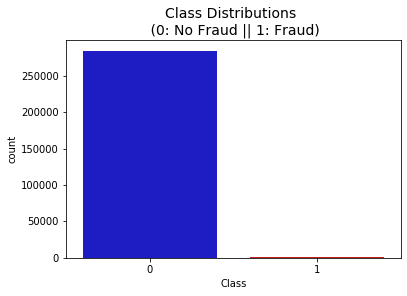

In [392]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Distribution Of Time & Amount

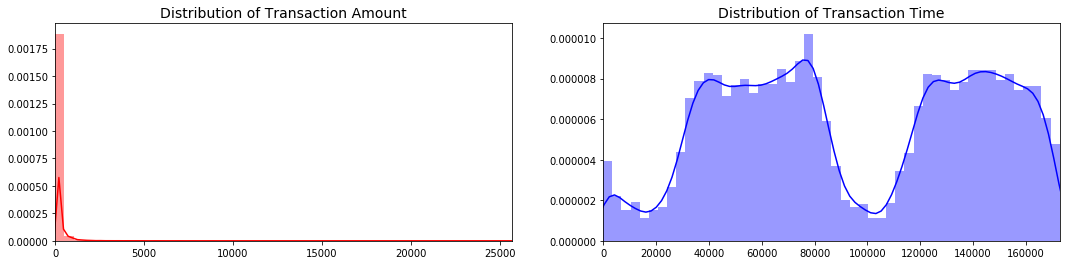

In [393]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### Undersampling OF Dataset

In [394]:
df = df.sample(frac=1)
print(df)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.shape

            Time        V1        V2        V3        V4        V5        V6  \
103417   68645.0 -0.794647  0.848260  2.162399  1.693819  0.897304  1.547116   
123284   76870.0 -1.500882 -0.109961  1.599557 -0.405910  5.190332 -4.265361   
86505    61263.0 -0.387202  1.110434  1.321203 -0.057487  0.124265 -0.642407   
153104   97901.0  1.754991 -0.590626  0.486189  1.739944 -0.808775  0.847122   
282801  171161.0 -1.891860  1.078146 -0.040357 -0.476806  0.630234  0.372344   
75522    56104.0 -0.633677  1.134030  2.187141  2.603697  0.010669  0.635021   
272117  164920.0 -1.355230 -0.481827 -0.890575 -1.612763  3.950375  2.825231   
107986   70704.0  1.208301  0.027405  0.157817  0.033400 -0.488490 -1.128058   
262405  160461.0  1.998797 -0.539857 -0.662174  0.112607 -0.267294  0.438139   
228237  145414.0  2.097432  0.107338 -2.075458  1.123544  0.898299 -0.363651   
23630    32848.0  1.344227  0.518438 -0.522180  0.866076  0.586740 -0.600847   
186965  127328.0  1.606239 -1.340511 -1.

(984, 31)

### Plot Of Equally Distributed Dataset

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


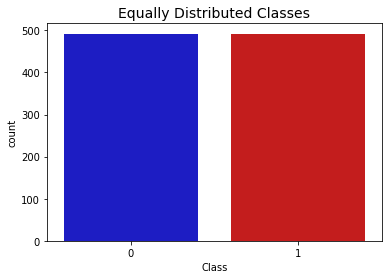

In [395]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Extraction of Features and Classes

In [396]:
X=new_df.iloc[:,:-1].values
y=new_df.iloc[:,-1].values

### Standardisation of Features

In [397]:
std=StandardScaler()
X[:,[0,29]]=std.fit_transform(X[:,[0,29]])
X,y

(array([[ 6.49096786e-01,  2.05516260e+00, -1.75109495e-01, ...,
         -8.17464806e-02, -6.28155480e-02, -3.50940161e-01],
        [ 1.11897320e+00, -1.17218292e+00,  1.66171287e+00, ...,
          8.22713228e-01,  4.94375178e-01, -3.59926971e-01],
        [-1.20693577e+00,  1.16263358e+00,  6.07941074e-02, ...,
         -7.91030616e-02,  1.84987014e-02, -1.60761807e-02],
        ...,
        [ 8.15274613e-01, -3.05841691e+00, -2.50285737e+00, ...,
          2.66860301e-01, -2.65474287e-01,  1.63486398e+00],
        [-1.31082283e+00, -1.65986647e+01,  1.05417508e+01, ...,
          1.70752055e+00,  5.11423169e-01, -1.59357618e-02],
        [-1.31034591e+00, -1.72751912e+01,  1.08196654e+01, ...,
          1.68406299e+00,  5.03739738e-01, -1.59357618e-02]]),
 array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       

### Splitting into Train and Test Set

In [398]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

### Determining Optimal Number Of Neighbours In KNN MODEL

In [399]:
from sklearn.model_selection import cross_val_score
x_axis = []
k_scores = []
for k in range(1,50, 2):
    x_axis.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train, y_train,  scoring='accuracy')
    k_scores.append(scores.mean())
    
    #Printing values
    print("K = ",k)
    print("Scores : ")
    print(scores)
    print("Mean Score = ",scores.mean())
    print()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


K =  1
Scores : 
[0.94331984 0.91869919 0.92653061]
Mean Score =  0.9295165457644826

K =  3
Scores : 
[0.951417   0.93089431 0.93061224]
Mean Score =  0.9376411859632104

K =  5
Scores : 
[0.951417   0.93089431 0.91836735]
Mean Score =  0.9335595533101494



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


K =  7
Scores : 
[0.951417   0.92682927 0.93469388]
Mean Score =  0.9376467166307622

K =  9
Scores : 
[0.95546559 0.92276423 0.93469388]
Mean Score =  0.9376412307459437

K =  11
Scores : 
[0.94736842 0.92276423 0.93469388]
Mean Score =  0.9349421754153094

K =  13
Scores : 
[0.951417   0.92276423 0.93061224]
Mean Score =  0.9349311588629395

K =  15
Scores : 
[0.95546559 0.91869919 0.92653061]
Mean Score =  0.9335651287604341



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


K =  17
Scores : 
[0.951417   0.91869919 0.92653061]
Mean Score =  0.932215601095117

K =  19
Scores : 
[0.94736842 0.92276423 0.92653061]
Mean Score =  0.9322210869799353

K = 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


 21
Scores : 
[0.951417   0.92276423 0.92653061]
Mean Score =  0.9335706146452525

K =  23
Scores : 
[0.951417   0.92276423 0.92653061]
Mean Score =  0.9335706146452525

K =  25
Scores : 


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.94736842 0.91869919 0.92653061]
Mean Score =  0.9308660734297999

K =  27
Scores : 
[0.951417   0.91463415 0.92653061]
Mean Score =  0.9308605875449815

K =  29
Scores : 
[0.94736842 0.91463415 0.92653061]
Mean Score =  0.9295110598796642



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


K =  31
Scores : 
[0.94736842 0.91463415 0.92653061]
Mean Score =  0.9295110598796642

K =  33
Scores : 
[0.94736842 0.91056911 0.93061224]
Mean Score =  0.9295165905472159

K =  35
Scores : 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



[0.94736842 0.90650407 0.93061224]
Mean Score =  0.9281615769970805

K =  37
Scores : 
[0.94736842 0.91056911 0.93061224]
Mean Score =  0.9295165905472159

K =  39
Scores : 
[0.94736842 0.90650407 0.93061224]
Mean Score =  0.9281615769970805



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

K =  41
Scores : 
[0.94736842 0.91056911 0.93061224]
Mean Score =  0.9295165905472159

K =  43
Scores : 
[0.94331984 0.91056911 0.93061224]
Mean Score =  0.9281670628818987



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


K =  45
Scores : 
[0.94331984 0.8902439  0.93061224]
Mean Score =  0.9213919951312213

K =  47
Scores : 
[0.93522267 0.8902439  0.93061224]
Mean Score =  0.9186929398005871

K =  49
Scores : 
[0.93522267 0.8902439  0.92653061]
Mean Score =  0.9173323955828999



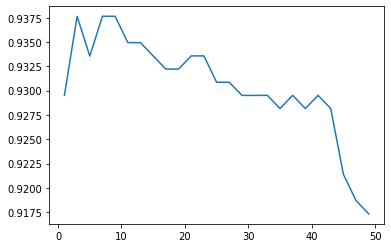

7

In [400]:
plt.plot(x_axis, k_scores)
plt.show()
optimal_k = x_axis[k_scores.index(max(k_scores))]
optimal_k

### Creating and Fitting the various Classifier Objects For Different Classification Algorithms

In [401]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)

dtc=DecisionTreeClassifier(criterion='entropy',random_state=0).fit(X_train, y_train)

knn=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2).fit(X_train, y_train)

nb=GaussianNB().fit(X_train, y_train)

svc=SVC(kernel='linear',random_state=0).fit(X_train, y_train)

### Finally Test The Model

In [402]:
y_pred1 = rfc.predict(X_test)
y_pred2 = dtc.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = nb.predict(X_test)
y_pred5 = svc.predict(X_test)

### Comparing Different Models Via Confusion Matrix

In [403]:
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
cm3=confusion_matrix(y_test,y_pred3)
cm4=confusion_matrix(y_test,y_pred4)
cm5=confusion_matrix(y_test,y_pred5)

print("Random Forest\t\t",cm1)
print("Decision Tree\t\t",cm2)
print("K Nearest Neighbours\t",cm3)
print("Naive Bayes\t\t",cm4)
print("Support Vector Machine\t",cm5)

Random Forest		 [[120   4]
 [ 16 106]]
Decision Tree		 [[110  14]
 [ 14 108]]
K Nearest Neighbours	 [[119   5]
 [ 20 102]]
Naive Bayes		 [[120   4]
 [ 20 102]]
Support Vector Machine	 [[118   6]
 [ 16 106]]


### Comparing different Models Via Accuracy Score

In [404]:
print("Random Forest\t\t",accuracy_score(y_test,y_pred1))
print("Decision Tree\t\t",accuracy_score(y_test,y_pred2))
print("K Nearest Neighbours\t",accuracy_score(y_test,y_pred3))
print("Naive Bayes\t\t",accuracy_score(y_test,y_pred4))
print("Support Vector Machine\t",accuracy_score(y_test,y_pred5))

Random Forest		 0.9186991869918699
Decision Tree		 0.8861788617886179
K Nearest Neighbours	 0.8983739837398373
Naive Bayes		 0.9024390243902439
Support Vector Machine	 0.9105691056910569


# RESULT:

### Random Forest Algorithm and SVM has the maximum Accuracy Score among other classsification algorithms and hence best fits for the Credit Card Fraud Detection Algorithm.









# ThankYou!!